This notebook is based off of this example of the datashaders package
https://examples.pyviz.org/attractors/attractors.html
William Balmer, 2/7/2020

In [1]:
import numpy as np, pandas as pd, datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import inferno, viridis
from numba import jit
from math import sin, cos, sqrt, fabs

print('Please input n')
n = int(input())

@jit(nopython=True)
def trajectory_coords(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    for i in np.arange(n-1):
        x[i+1], y[i+1] = fn(x[i], y[i], a, b, c, d, e, f)
    return x,y

def trajectory(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = trajectory_coords(fn, x0, y0, a, b, c, d, e, f, n)
    return pd.DataFrame(dict(x=x,y=y))

def dsplot(fn, vals, n=n, cmap=viridis, label=True):
    """Return a Datashader image by collecting `n` trajectory points for the given attractor `fn`"""
    lab = ("{}, "*(len(vals)-1)+" {}").format(*vals) if label else None
    df  = trajectory(fn, *vals, n=n)
    cvs = ds.Canvas(plot_width = 300, plot_height = 300)
    agg = cvs.points(df, 'x', 'y')
    img = tf.shade(agg, cmap=cmap, name=lab)
    return img

from colorcet import palette
palette["viridis"]=viridis
palette["inferno"]=inferno

import yaml
vals = yaml.load(open("strange_attractors.yml","r"), Loader=yaml.FullLoader)

def args(name):
    """Return a list of available argument lists for the given type of attractor"""
    return [v[1:] for v in vals if v[0]==name]

def plot(fn, vals=None, **kw):
    """Plot the given attractor `fn` once per provided set of arguments."""
    vargs=args(fn.__name__) if vals is None else vals
    return tf.Images(*[dsplot(fn, v[1:], cmap=palette[v[0]][::-1], **kw) for v in vargs]).cols(4)

Please input n
2000000


In [2]:
@jit(nopython=True)
def Symmetric_Icon(x, y, a, b, g, om, l, d, *o):
    zzbar = x*x + y*y
    p = a*zzbar + l
    zreal, zimag = x, y

    for i in range(1, d-1):
        za, zb = zreal * x - zimag * y, zimag * x + zreal * y
        zreal, zimag = za, zb

    zn = x*zreal - y*zimag
    p += b*zn

    return p*x + g*zreal - om*y, \
           p*y - g*zimag + om*x

In [3]:
%%timeit
plot(Symmetric_Icon)

1.66 s ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


"0.01, 0.01, 1.8, 0.0, 1.0, 0.1, -1.93, 5","0.01, 0.01, 5.0, -1.0, 1.0, 0.188, -2.5, 5","0.01, 0.01, -1.0, 0.1, -0.82, 0.12, 1.56, 3","0.01, 0.01, 1.806, 0.0, 1.0, 0.0, -1.806, 5"
"0.01, 0.01, 10.0, -12.0, 1.0, 0.0, -2.195, 3","0.01, 0.01, -2.5, 0.0, 0.9, 0.0, 2.5, 3","0.01, 0.01, 3.0, -16.79, 1.0, 0.0, -2.05, 9","0.01, 0.01, 5.0, 1.5, 1.0, 0.0, -2.7, 6"
"0.01, 0.01, 1.0, -0.1, 0.167, 0.0, -2.08, 7","0.01, 0.01, 2.32, 0.0, 0.75, 0.0, -2.32, 5","0.01, 0.01, -2.0, 0.0, -0.5, 0.0, 2.6, 5","0.01, 0.01, 2.0, 0.2, 0.1, 0.0, -2.34, 5"
"0.01, 0.01, 2.0, 0.0, 1.0, 0.1, -1.86, 4","0.01, 0.01, -1.0, 0.1, -0.82, 0.0, 1.56, 3","0.01, 0.01, -1.0, 0.03, -0.8, 0.0, 1.455, 3","0.01, 0.01, -2.5, -0.1, 0.9, -0.15, 2.39, 16"

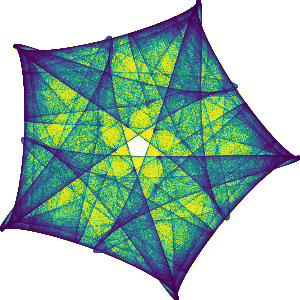
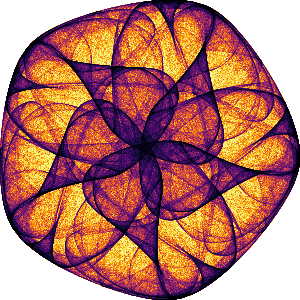
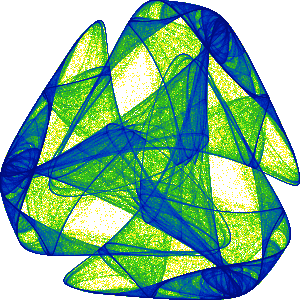
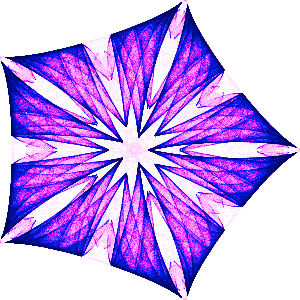
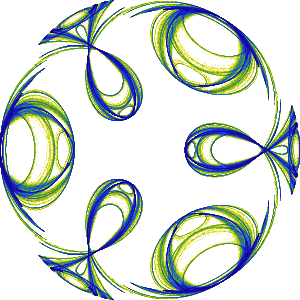
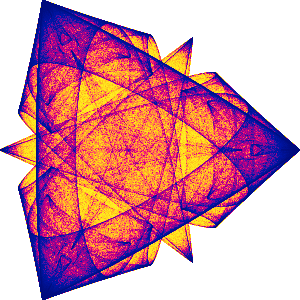
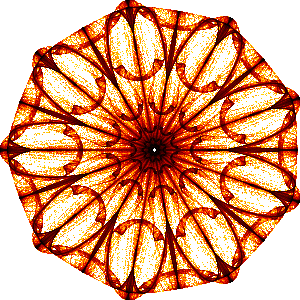
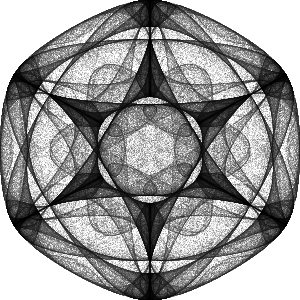
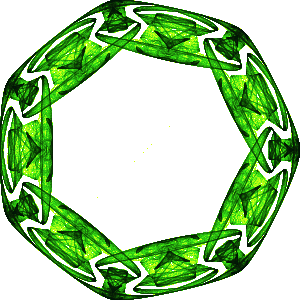
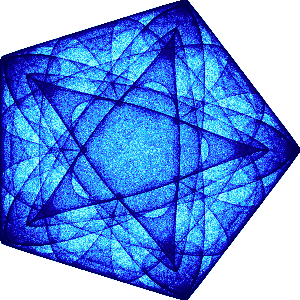
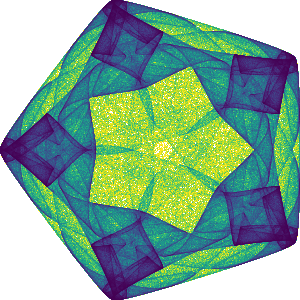
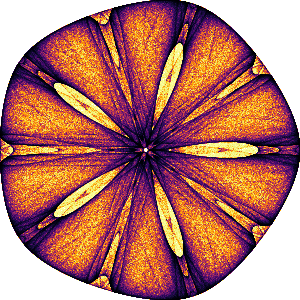
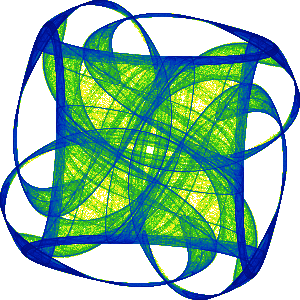
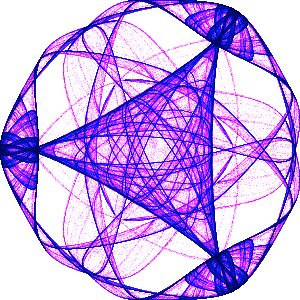
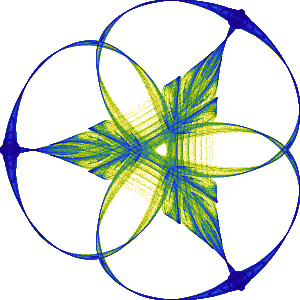
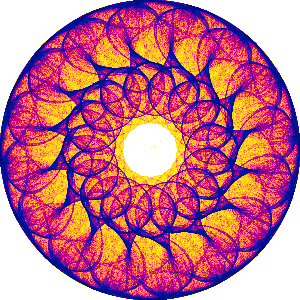

In [4]:
plot(Symmetric_Icon)